# Project 3: Data Cleaning and EDA

Using the data obtained in the API notebook, I will create a single data frame to use in creating a classification using Natural Language Processing. 

In [1]:
import pandas as pd
import glob 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400


In [2]:
# Argo helped me with the library, 'glob'. Glob lets you define a folder as a variable

files = glob.glob('../project-3/Data/*.csv') # * is the thing that is different, the files variable is not a list, but it is a 'list' of files... like a folder.

list = []

for file in files:
    list.append(pd.read_csv(file))

posts = pd.concat(list)

### Getting to know the data

In [3]:
# Looking into the posts dataframe
print('\033[1mDimensions before removing duplicates:\033[0m', '\n')
print(posts.shape)
print('='*30, '\n')

print('\033[1mInformation before removing duplicates:\033[0m', '\n')
print(posts.info())
print('='*30, '\n')

print('\033[1mdata types:\033[0m', '\n')
print(posts.dtypes)
print('='*30, '\n')

print(f'\033[1mNull Values:\033[0m {posts.isnull().sum()}','\n')
print('='*30, '\n')

print(f'\033[1mPost Value Counts before removing duplicates:\033[0m','\n')
print(posts['source'].value_counts())

posts.head(2)

Dimensions before removing duplicates: 

(9413, 3)

Information before removing duplicates: 

<class 'pandas.core.frame.DataFrame'>
Index: 9413 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9413 non-null   object
 1   post    9156 non-null   object
 2   source  9413 non-null   object
dtypes: object(3)
memory usage: 294.2+ KB
None

data types: 

title     object
post      object
source    object
dtype: object

Null Values: title       0
post      257
source      0
dtype: int64 


Post Value Counts before removing duplicates: 

source
AskLawyers       6611
AmItheAsshole    2802
Name: count, dtype: int64


,title,post,source
0,New Moderation,"Hey there, fellow Redditors. I took over moderation of this subreddit earlier today. I had come to ask a question (since answered offline) about a week ago and found the sub unmoderated. I didn’t want to see this sub suspended or deleted due to lack of moderation, so here I am.\n\nI have no idea what happened to the previous moderator(s), the moderation decisions they made, or the reasons for ...",AskLawyers
1,Rules Update (20240316),"Post titles now require the two-letter postal abbreviation for the U.S. state or territory to which the question applies. If the question applies outside the U.S., use [non-US].\n\nExample title formats: \n`[DC] Is this formatted correctly?` \n`[non-US] Is this formatted correctly?`",AskLawyers


### Cleaning Imported Data

In [4]:
# citation: GA DSB lesson 6.04
# noticed all titles had 'AITA' at the beginning
posts['title'] = posts['title'].str.replace('AITA', '')

# noticed titles with 'WIBTA' at the beginning
posts['title'] = posts['title'].str.replace('WIBTA', '')

# dropping duplicate posts 
posts.drop_duplicates(inplace = True)


In [5]:
# Looking into the posts dataframe after removing duplicates
print('\033[1mDimensions after removing duplicates:\033[0m', '\n')
print(posts.shape)
print('='*30, '\n')

print('\033[1mInformation after removing duplicates:\033[0m', '\n')
print(posts.info())
print('='*30, '\n')

print(f'\033[1mPosts Shape after removing duplicates:\033[0m {posts.shape}','\n')
print('='*30, '\n')

print(f'\033[1mNull Values after removing duplicates:\033[0m {posts.isnull().sum()}','\n')
print('='*30, '\n')



Dimensions after removing duplicates: 

(2149, 3)

Information after removing duplicates: 

<class 'pandas.core.frame.DataFrame'>
Index: 2149 entries, 0 to 26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2149 non-null   object
 1   post    2128 non-null   object
 2   source  2149 non-null   object
dtypes: object(3)
memory usage: 67.2+ KB
None

Posts Shape after removing duplicates: (2149, 3) 


Null Values after removing duplicates: title      0
post      21
source     0
dtype: int64 




---
## Filling Null Values
There are 21 posts with missing content. To address this, I replaced the missing content with the post title, as it's a common practice in discussion forums to use the title as the post itself.

In [6]:
posts.isnull().sum()

title      0
post      21
source     0
dtype: int64

In [7]:
posts['post'] = posts['post'].fillna(posts['title'])
posts['post'].isnull().sum()

0

---
Saving the clean data frame, to use in the Modeling Notebook

In [8]:
posts.to_csv('./Data/clean_posts', index = False)

---
### EDA & Data preparation for modeling

#### Binarizing the target column: 'source'
**Note:** "Am I the Asshole" will be target class 1.

In [9]:
posts['source'] = posts['source'].map({'AmItheAsshole': 1, 'AskLawyers' : 0})

---
#### New columns:
post_length: the number of characters in a post
post_word_count: the number of words in a post.

In [10]:
# number of characters in a post
posts['post_length_char'] = [len(post) for post in posts['post']]

# post_word_count uses spaces (' ') to count words
posts['post_word_count'] = [len(post.split(' ')) for post in posts['post']]

---
#### What are the longest and shortest posts?

In [11]:
# First, I will sort them by their word count
posts = posts.sort_values(by = 'post_word_count', ascending = False)

In [12]:
# the longest posts are:
print('\033[1mThe ten longest posts are:\033[0m', '\n')
posts.head(10)

The ten longest posts are: 



,title,post,source,post_length_char,post_word_count
29,[PA] Do I Have A Law Suit At Work?,"\nBackstory:\n\nI (23m) began working for a union labor paper mill in 2022. The first 6 months I was in the warehouse, nothing special happened, and then I got an internal position in a better department in the mill. I have been here since October of 2022. There are about 40 men in my department, and we are all split into 4 crews: A crew, B crew, C crew, and D crew. During my first 8 weeks in ...",0,9140,1693
25,[CA] Stolen Childhood Settlement,"Stolen Childhood Settlement \n\nI was ran over as a child. Eight years old; almost every rib broken or cracked, lung punctured by my rib and I’m pretty sure I have breathing problems from the ensuing scar tissue that developed on my lung; concussion, liver bruised, both eye vessels popped and the whites of my eyes filled with blood. Was out of school for months. My mother sued and I very speci...",0,8465,1624
35,[CA] Case against Ford?,"We bought a 2006 Ford E450 retired emergency relief vehicle when it had 48.5k miles. We converted it into an RV to travel and work around the US. Purchased, registered and insured in NY.\n\nTLDR at the bottom.\n\nIn June 2023, at 67.8k miles we had a fuel injector break off into the engine and had to replace the engine. We spent $21,119.17 to get a complete engine at a Portland, OR Ford with a...",0,7312,1342
18,[FL] Bullied for years at work until I recently refused to work with my bully. They've now put me on unpaid leave until I agree to work with him. I don't want to blow up my career by suing. Can anything be done?,"I'm hesitant to reach out to a lawyer because I'm not sure what can be done, but as this has unfolded MANY people I work with have encouraged me to speak with someone because they feel our employers treatment of me has been so horrendous. \n\n \nI work in a hospital and I've worked at this hospital for over a decade. I have a great working relationship with everyone I interact with. I have ne...",0,7026,1297
75,for being mad my (F31) fiance (M31) secretly spent our small travel fund?,"UPDATE: First of all, thank you all for the comments and the valuable insights. I tried to respond to everyone's questions and advice but it became impossible, what with hundreds of comments flooding in which is not something I expected so yes, thank you!\n\nI'm not sure this is how you do an update so I hope everyone who was interested in the update will be able to see this!\n\nFirst, let me ...",1,6479,1276
25,if I put a lien against my parents' house and sued them for my college tuition?,"I, 17F, am graduating high school next month and am set to attend my first-choice college with a partial scholarship in the fall. It's an instate school about an hour away, and because of my dual enrollment credits, I should only be 5 semesters from finishing my bachelor's degree and then going for the master's degree I need for the career I want.\n\nFive years ago my Mamaw, (mom's mom) died, ...",1,6610,1262
85,"[ID] Personal injury,Landlord Tenant or Both?",# \n\nLegal aide has an advice line but it seems stuck in a loop. I cannot get past the recording to talk to an attorney and I need some advice so attorneys?\n\nI live in a complex that was built almost three years ago. I moved into my apartment one week after it was completed. I have an electric fireplace that I have never been able to use. When I complained about the smell-from the first tim...,0,5888,1090
46,[MN] How do I go about pressing charges against a person who was paid t my fix my car but didn't?,"This is my first post on Reddit, so I'll try my best to get to the point without making it too long!🤦🏻‍♀️😂 This story takes place from January 24th-February 30th.\n\nA ""friend"", more like an acquaintance that we met through another friend, offered to fix our car (1-3 days tops) &amp; he would accept getting paid in weekly increments as long as we made a large(ish) payment when we picked the ca...",0,5291,1050
39,for ye

In [13]:
print('\033[1mThe ten shortest posts are:\033[0m', '\n') 
posts.tail(10)

The ten shortest posts are: 



,title,post,source,post_length_char,post_word_count
13,[NJ] Can my nephew start and be a member in an LLC?,"He's a non green card holder, non permanent resident, and 14 years old.",0,71,13
67,[NC] what would the sentence/charge look like for shoplifting ~50$ worth of stuff?,[NC] what would the sentence/charge look like for shoplifting ~50$ worth of stuff?,0,82,13
84,[NC] help with spousal support,What do I need to do to prepare for spousal support court?,0,59,13
85,[MI] Would this be exempt from FOIA?,A letter to code enforcement regarding my property from my attorney.,0,69,12
83,[CA] Advice: Non-Compete Clause in Job Offer - California Law Query,[CA] Advice: Non-Compete Clause in Job Offer - California Law Query,0,67,11
40,[IL] Is discord legally considered a Social Media Platform?,[IL] Is discord legally considered a Social Media Platform?,0,59,9
27,[KS] Can you legally keep a doorstep baby?,[KS] Can you legally keep a doorstep baby?,0,42,8
65,[TX] What does the X mean?,[TX] What does the X mean?,0,26,6
59,[WA] Changing Executors,[WA] Changing Executors,0,23,3
88,[OH] What happens at a status conference in a civil lawsuit? (Pro Se) franklin county court of common pleas,Thank you,0,9,2


**Observation:** The shortest posts all came from AskLawyers

### Distribution of Post Lengths by Character Count and Word Count

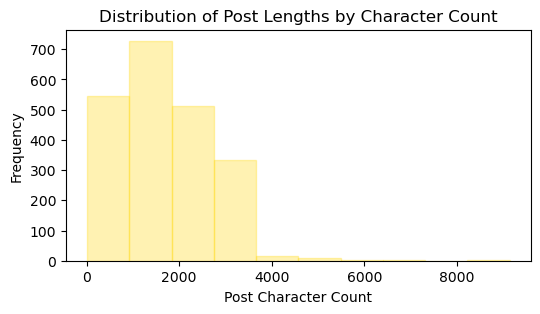

In [14]:
# Histogram for character count
plt.figure(figsize = (6, 3));

plt.hist(posts['post_length_char'], edgecolor = 'gold', color = 'gold', alpha = 0.3);
plt.xlabel('Post Character Count');
plt.ylabel('Frequency');
plt.title('Distribution of Post Lengths by Character Count');

# Saving Figure to Images folder
plt.savefig('./Images/bar_post_len_by_char')

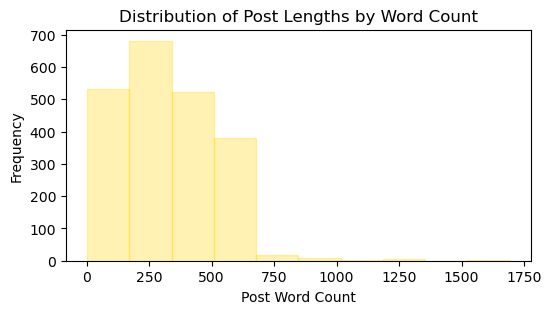

In [15]:
# Histogram for word count
plt.figure(figsize = (6, 3));

plt.hist(posts['post_word_count'], edgecolor = 'gold', color = 'gold', alpha = 0.3);
plt.xlabel('Post Word Count');
plt.ylabel('Frequency');
plt.title('Distribution of Post Lengths by Word Count');

# Saving Figure to Images folder
plt.savefig('./Images/bar_post_len_by_words')

#### Looking at the distribution of words and characters for posts out of AITA and AL separately

In [16]:
# Separating the 'posts' data frame by source
aita_only = posts[posts['source'] == 1]
al_only = posts[posts['source'] == 0]

# Two new data frames: one for each source
aita_df = aita_only[['post', 'title', 'source','post_length_char', 'post_word_count'  ]]
al_df = al_only[['post', 'title', 'source','post_length_char', 'post_word_count']]

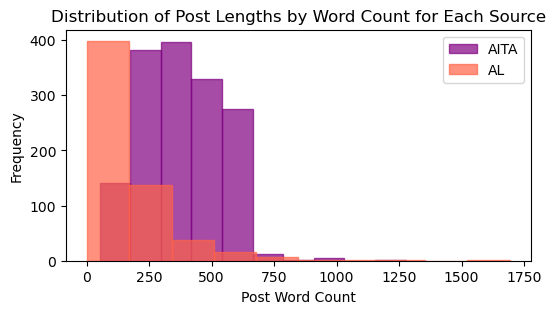

In [17]:
# Histogram for character count for posts from AITA and AL
plt.figure(figsize = (6, 3));

#AITA
plt.hist(aita_df['post_word_count'], 
         edgecolor = 'purple', 
         color = 'purple', 
         alpha = 0.7, label = 'AITA');
plt.xlabel('Post Word Count');
plt.ylabel('Frequency');
plt.title('Distribution of Post Lengths by Word Count for Each Source');

#AL
plt.hist(al_df['post_word_count'], edgecolor = 'tomato', color = 'tomato', alpha = 0.7, label = 'AL');
plt.legend()

# Saving Figure to Images folder
plt.savefig('./Images/bar_post_len_by_word_al_aita')

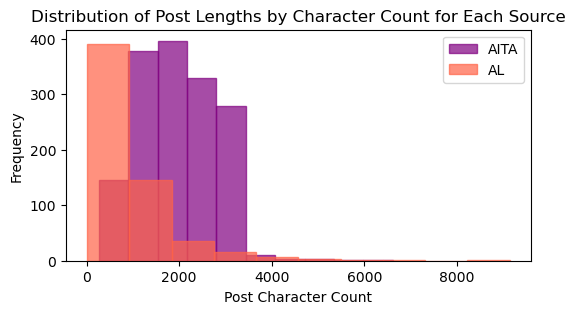

In [18]:
# Histogram for character count for posts from AITA and AL
plt.figure(figsize = (6, 3));

#AITA
plt.hist(aita_df['post_length_char'], edgecolor = 'purple', color = 'purple', alpha = 0.7, label = 'AITA');
plt.xlabel('Post Character Count');
plt.ylabel('Frequency');
plt.title('Distribution of Post Lengths by Character Count for Each Source');

#AL
plt.hist(al_df['post_length_char'], edgecolor = 'tomato', color = 'tomato', alpha = 0.7, label = 'AL');
plt.legend()

# Saving Figure to Images folder
plt.savefig('./Images/bar_post_len_by_char_al_aita')

---
### What are the top words that appear in each source?

**1.** I will write a preprocessor function that uses regular expressions to remove URLs, emojis, and special characters.
` for emojis. *citations:* [Stack Overflow]('https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python'), [PyNative]('https://pynative.com/python-regex-compile/'), [StackOverflow]('https://stackoverflow.com/questions/64509631/is-there-a-regex-to-match-all-unicode-emojis')

**2,** I will define a lemmatize-tokenize function to use in `CountVectorizer`. *citations:* [GitHub Gist]('https://gist.github.com/MaxHalford/68b584e9154098151e6d9b5aa7464948')

**3,** I will use `CountVectorizer`, with a custom, more comprehensive, list of `stop_words` and the function to remove URLs. Then, create a new data frame, with the count-vectorized posts. *citation:* GA Lesson 6.04, [stop words]('https://www.kaggle.com/datasets/rowhitswami/stopwords')

**4,** I will repeat these steps with the data frames for each source (`aita_df` and `al_df`), as it will allow me to look into patterns for each post.

**note:** When I model the data, I will use `GridSearch` to optimize parameters like `max_features`, `min_df`,`max_df`, and `ngram_range`.

In [19]:
# Function to address URLs
def remove_urls_emojis(post):
    # remove URLs
    url_exp = re.compile(r'https?://\S+|www\.\S+') #find URLs
    post = url_exp.sub('', post) #replace w/ an empty string

    # remove Emojis
    emoji_exp = re.compile('['
        u'\U0001F300-\U0001F5FF'
        u'\U0001F600-\U0001F64F'
        u'\U0001F680-\U0001F6FF'
        u'\U0001F700-\U0001F77F'
        u'\U0001F780-\U0001F7FF'
        u'\U0001F800-\U0001F8FF'
        u'\U0001F900-\U0001F9FF'
        u'\U0001FA00-\U0001FA6F'
        u'\U0001FA70-\U0001FAFF'
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    post = emoji_exp.sub('', post)
    
    # remove special characters
    post = re.sub(r'[^a-zA-Z0-9\s]', '', post)
    
    return post

# Function a to tokenize and one to lemmatize
def tokenize(post):
    tokens = nltk.word_tokenize(post)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]


# Define custom stop words from kaggle list cited above
custom_stop_words = [
    'I', 'Im','ha', 'le', 'u', 'wa', 'x', 'y', 'your', 'yours', 'yourself', 'yourselves', 'you', 'yond', 'yonder', 'yon', 'ye', 'yet', 'z', 'zillion', 'j', 'u', 'umpteen', 'usually', 'us', 'username', 'uponed', 'upons', 'uponing', 'upon', 'ups', 'upping', 'upped', 'up', 'unto', 'until', 'unless', 'unlike', 'unliker', 'unlikest', 'under', 'underneath', 'use', 'used', 'usedest', 'r', 'rath', 'rather', 'rathest', 'rathe', 're', 'relate', 'related', 'relatively', 'regarding', 'really', 'res', 'respecting', 'respectively', 'q', 'quite', 'que', 'qua', 'n', 'neither', 'neaths', 'neath', 'nethe', 'nethermost', 'necessary', 'necessariest', 'necessarier', 'never', 'nevertheless', 'nigh', 'nighest', 'nigher', 'nine', 'noone', 'nobody', 'nobodies', 'nowhere', 'nowheres', 'no', 'noes', 'nor', 'nos', 'no-one', 'none', 'not', 'notwithstanding', 'nothings', 'nothing', 'nathless', 'natheless', 't', 'ten', 'tills', 'till', 'tilled', 'tilling', 'to', 'towards', 'toward', 'towardest', 'towarder', 'together', 'too', 'thy', 'thyself', 'thus', 'than', 'that', 'those', 'thou', 'though', 'thous', 'thouses', 'thoroughest', 'thorougher', 'thorough', 'thoroughly', 'thru', 'thruer', 'thruest', 'thro', 'through', 'throughout', 'throughest', 'througher', 'thine', 'this', 'thises', 'they', 'thee', 'the', 'then', 'thence', 'thenest', 'thener', 'them', 'themselves', 'these', 'therer', 'there', 'thereby', 'therest', 'thereafter', 'therein', 'thereupon', 'therefore', 'their', 'theirs', 'thing', 'things', 'three', 'two', 'o', 'oh', 'owt', 'owning', 'owned', 'own', 'owns', 'others', 'other', 'otherwise', 'otherwisest', 'otherwiser', 'of', 'often', 'oftener', 'oftenest', 'off', 'offs', 'offest', 'one', 'ought', 'oughts', 'our', 'ours', 'ourselves', 'ourself', 'out', 'outest', 'outed', 'outwith', 'outs', 'outside', 'over', 'overallest', 'overaller', 'overalls', 'overall', 'overs', 'or', 'orer', 'orest', 'on', 'oneself', 'onest', 'ons', 'onto', 'a', 'atween', 'at', 'athwart', 'atop', 'afore', 'afterward', 'afterwards', 'after', 'afterest', 'afterer', 'ain', 'an', 'any', 'anything', 'anybody', 'anyone', 'anyhow', 'anywhere', 'anent', 'anear', 'and', 'andor', 'another', 'around', 'ares', 'are', 'aest', 'aer', 'against', 'again', 'accordingly', 'abaft', 'abafter', 'abaftest', 'abovest', 'above', 'abover', 'abouter', 'aboutest', 'about', 'aid', 'amidst', 'amid', 'among', 'amongst', 'apartest', 'aparter', 'apart', 'appeared', 'appears', 'appear', 'appearing', 'appropriating', 'appropriate', 'appropriatest', 'appropriates', 'appropriater', 'appropriated', 'already', 'always', 'also', 'along', 'alongside', 'although', 'almost', 'all', 'allest', 'aller', 'allyou', 'alls', 'albeit', 'awfully', 'as', 'aside', 'asides', 'aslant', 'ases', 'astrider', 'astride', 'astridest', 'astraddlest', 'astraddler', 'astraddle', 'availablest', 'availabler', 'available', 'aughts', 'aught', 'vs', 'v', 'variousest', 'variouser', 'various', 'via', 'vis-a-vis', 'vis-a-viser', 'vis-a-visest', 'viz', 'very', 'veriest', 'verier', 'versus', 'k', 'g', 'go', 'gone', 'good', 'got', 'gotta', 'gotten', 'get', 'gets', 'getting', 'b', 'by', 'byandby', 'by-and-by', 'bist', 'both', 'but', 'buts', 'be', 'beyond', 'because', 'became', 'becomes', 'become', 'becoming', 'becomings', 'becominger', 'becomingest', 'behind', 'behinds', 'before', 'beforehand', 'beforehandest', 'beforehander', 'bettered', 'betters', 'better', 'bettering', 'betwixt', 'between', 'beneath', 'been', 'below', 'besides', 'beside', 'm', 'my', 'myself', 'mucher', 'muchest', 'much', 'must', 'musts', 'musths', 'musth', 'main', 'make', 'mayest', 'many', 'mauger', 'maugre', 'me', 'meanwhiles', 'meanwhile', 'mostly', 'most', 'moreover', 'more', 'might', 'mights', 'midst', 'midsts', 'h', 'huh', 'humph', 'he', 'hers', 'herself', 'her', 'hereby', 'herein', 'hereafters', 'hereafter', 'hereupon', 'hence', 'hadst', 'had', 'having', 'haves', 'have', 'has', 'hast', 'hardly', 'hae', 'hath', 'him', 'himself', 'hither', 'hitherest', 'hitherer', 'his', 'how-do-you-do', 'however', 'how', 'howbeit', 'howdoyoudo', 'hoos', 'hoo', 'w', 'woulded', 'woulding', 'would', 'woulds', 'was', 'wast', 'we', 'wert', 'were', 'with', 'withal', 'without', 'within', 'why', 'what', 'whatever', 'whateverer', 'whateverest', 'whatsoeverer', 'whatsoeverest', 'whatsoever', 'whence', 'whencesoever', 'whenever', 'whensoever', 'when', 'whenas', 'whether', 'wheen', 'whereto', 'whereupon', 'wherever', 'whereon', 'whereof', 'where', 'whereby', 'wherewithal', 'wherewith', 'whereinto', 'wherein', 'whereafter', 'whereas', 'wheresoever', 'wherefrom', 'which', 'whichever', 'whichsoever', 'whilst', 'while', 'whiles', 'whithersoever', 'whither', 'whoever', 'whosoever', 'whoso', 'whose', 'whomever', 's', 'syne', 'syn', 'shalling', 'shall', 'shalled', 'shalls', 'shoulding', 'should', 'shoulded', 'shoulds', 'she', 'sayyid', 'sayid', 'said', 'saider', 'saidest', 'same', 'samest', 'sames', 'samer', 'saved', 'sans', 'sanses', 'sanserifs', 'sanserif', 'so', 'soer', 'soest', 'sobeit', 'someone', 'somebody', 'somehow', 'some', 'somewhere', 'somewhat', 'something', 'sometimest', 'sometimes', 'sometimer', 'sometime', 'several', 'severaler', 'severalest', 'serious', 'seriousest', 'seriouser', 'senza', 'send', 'sent', 'seem', 'seems', 'seemed', 'seemingest', 'seeminger', 'seemings', 'seven', 'summat', 'sups', 'sup', 'supping', 'supped', 'such', 'since', 'sine', 'sines', 'sith', 'six', 'stop', 'stopped', 'p', 'plaintiff', 'plenty', 'plenties', 'please', 'pleased', 'pleases', 'per', 'perhaps', 'particulars', 'particularly', 'particular', 'particularest', 'particularer', 'pro', 'providing', 'provides', 'provided', 'provide', 'probably', 'l', 'layabout', 'layabouts', 'latter', 'latterest', 'latterer', 'latterly', 'latters', 'lots', 'lotting', 'lotted', 'lot', 'lest', 'less', 'ie', 'ifs', 'if', 'i', 'info', 'information', 'itself', 'its', 'it', 'is', 'idem', 'idemer', 'idemest', 'immediate', 'immediately', 'immediatest', 'immediater', 'in', 'inwards', 'inwardest', 'inwarder', 'inward', 'inasmuch', 'into', 'instead', 'insofar', 'indicates', 'indicated', 'indicate', 'indicating', 'indeed', 'inc', 'f', 'fact', 'facts', 'fs', 'figupon', 'figupons', 'figuponing', 'figuponed', 'few', 'fewer', 'fewest', 'frae', 'from', 'failing', 'failings', 'five', 'furthers', 'furtherer', 'furthered', 'furtherest', 'further', 'furthering', 'furthermore', 'fourscore', 'followthrough', 'for', 'forwhy', 'fornenst', 'formerly', 'former', 'formerer', 'formerest', 'formers', 'forbye', 'forby', 'fore', 'forever', 'forer', 'fores', 'four', 'd', 'ddays', 'dday', 'do', 'doing', 'doings', 'doe', 'does', 'doth', 'downwarder', 'downwardest', 'downward', 'downwards', 'downs', 'done', 'doner', 'dones', 'donest', 'dos', 'dost', 'did', 'differentest', 'differenter', 'different', 'describing', 'describe', 'describes', 'described', 'despiting', 'despites', 'despited', 'despite', 'during', 'c', 'cum', 'circa', 'chez', 'cer', 'certain', 'certainest', 'certainer', 'cest', 'canst', 'cannot', 'cant', 'cants', 'canting', 'cantest', 'canted', 'co', 'could', 'couldst', 'comeon', 'comeons', 'come-ons', 'come-on', 'concerning', 'concerninger', 'concerningest', 'consequently', 'considering', 'e', 'eg', 'eight', 'either', 'even', 'evens', 'evenser', 'evensest', 'evened', 'evenest', 'ever', 'everyone', 'everything', 'everybody', 'everywhere', 'every', 'ere', 'each', 'et', 'etc', 'elsewhere', 'else', 'ex', 'excepted', 'excepts', 'except', 'excepting', 'exes', 'enough'
]


In [20]:
# Instantiating a CountVectorizer object & fitting all data.
cvec = CountVectorizer(tokenizer = tokenize, 
                       preprocessor = remove_urls_emojis, 
                       stop_words = custom_stop_words,
                       max_df = 0.95).fit(posts['post'])

# transforming posts['post'] and storing as post_cvec_transform
post_cvec_transform = cvec.transform(posts['post'])

# New data frame, using .todense() on transformed data
df_cvec = pd.DataFrame(post_cvec_transform.todense(), 
                       columns = cvec.get_feature_names_out())



# Repeating for AITA data frame
# instantiate
cvec_aita = cvec.transform(aita_df['post'])
# transform
# cvec_aita_transform = cvec_aita.transform(posts['post'])

# make data frame
df_aita = pd.DataFrame(cvec_aita.todense(), 
                       columns = cvec.get_feature_names_out())



# Repeating for AL data frame
#instantiate
cvec_al= cvec.transform(posts['post'])
#transform


# make data frame
df_al= pd.DataFrame(cvec_al.todense(), 
                    columns = cvec.get_feature_names_out())

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['can', 'down', 'plea', 'ta', 'visavis', 'visaviser', 'visavisest'] not in stop_words.
  warnings.warn(


In [21]:
len(cvec.get_feature_names_out())

19016

**Top 15 Words for all posts combined**

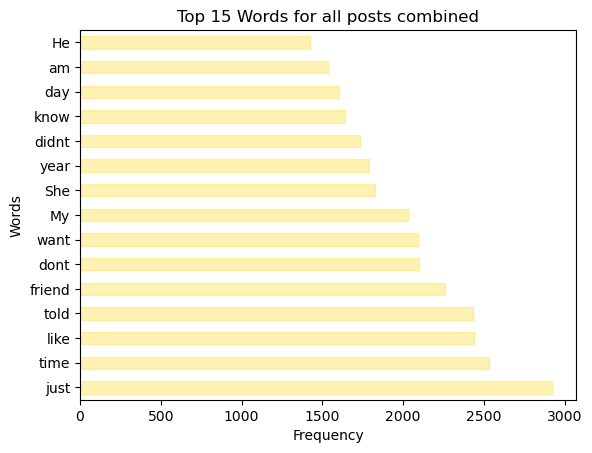

In [22]:
df_cvec.sum().sort_values(ascending = False).head(15).plot(kind = 'barh', 
                                                           color = 'gold', 
                                                           alpha = 0.3, 
                                                           edgecolor = 'gold');

plt.title('Top 15 Words for all posts combined');
plt.xlabel('Frequency');
plt.ylabel('Words');

# Saving Figure to Images folder
plt.savefig('./Images/bar_most_common_all')

**Top 15 Words for AITA posts**

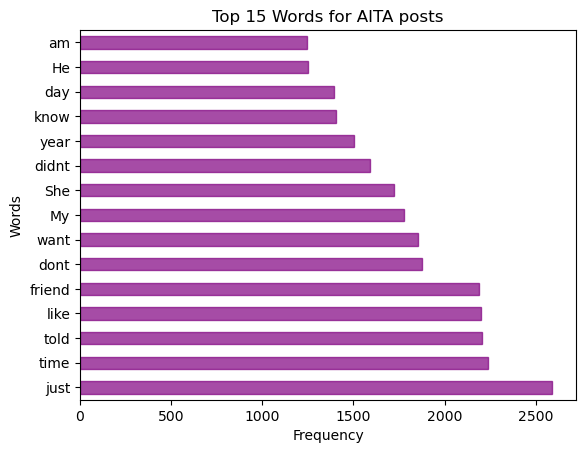

In [23]:
df_aita.sum().sort_values(ascending = False).head(15).plot(kind = 'barh', color = 'purple', alpha = 0.7, edgecolor = 'purple');

plt.title('Top 15 Words for AITA posts');
plt.xlabel('Frequency');
plt.ylabel('Words');

# Saving Figure to Images folder
plt.savefig('./Images/bar_most_common_AITA')

**Top 15 Words for AL posts**

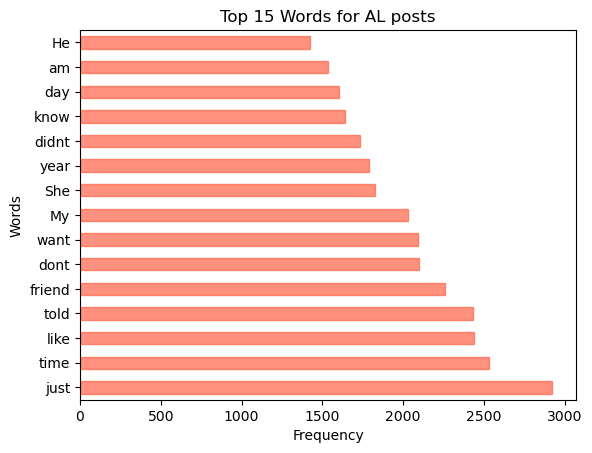

In [24]:
df_al.sum().sort_values(ascending = False).head(15).plot(kind = 'barh', color = 'tomato', alpha = 0.7, edgecolor = 'tomato');

plt.title('Top 15 Words for AL posts');
plt.xlabel('Frequency');
plt.ylabel('Words');

# Saving Figure to Images folder
plt.savefig('./Images/bar_most_common_AL')